<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from scipy import stats
from matplotlib import pyplot as plt
import folium

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [5]:
# Read CSV
house_csv = r"C:\Users\ryant\Desktop\IOD\DATA\Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [9]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [13]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [7]:
#convert zip column to string
df['zip'] = df['zip'].astype(str)

In [17]:
df.info() #confirm zip converted to object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [9]:
#convert sale date to date removing irrelevant strings
df['sale_date'] = df['sale_date'].str.replace(' EDT', '', regex=True)

In [11]:
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%a %b %d %H:%M:%S %Y') #convert to datetime datatype

In [11]:
df.dtypes 

street               object
city                 object
zip                  object
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
dtype: object

In [13]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,2008-05-15,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,2008-05-15,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15,235301,38.417000,-121.397424


In [27]:
df.describe()

,beds,baths,sq__ft,sale_date,price,latitude,longitude
count,985.000000,985.000000,985.000000,985,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,2008-05-18 05:12:51.167512576,234144.263959,38.607732,-121.355982
min,0.000000,0.000000,0.000000,2008-05-15 00:00:00,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,2008-05-16 00:00:00,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,2008-05-19 00:00:00,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,2008-05-20 00:00:00,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,2008-05-21 00:00:00,884790.000000,39.020808,-120.597599
std,1.307932,0.895371,853.048243,NaN,138365.839085,0.145433,0.138278


In [13]:
bbs = df[(df[['beds', 'baths', 'sq__ft']] == 0).all(axis=1)] #rows that have 0's for beds, baths and sqft (bbs)
bbs

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15,200100,38.569943,-121.527539


In [15]:
bbs['type'].unique() #types of homes that have zero's

array(['Residential', 'Condo', 'Unkown'], dtype=object)

In [17]:
df.loc[(df['beds'] == 0) & (df['baths'] == 0) & (df['sq__ft'] == 0), 'type'] = 'Plot' #add plot as a type for no beds, baths and sqfeet.

In [19]:
df['type'].value_counts()

type
Residential     818
Plot            108
Condo            46
Multi-Family     13
Name: count, dtype: int64

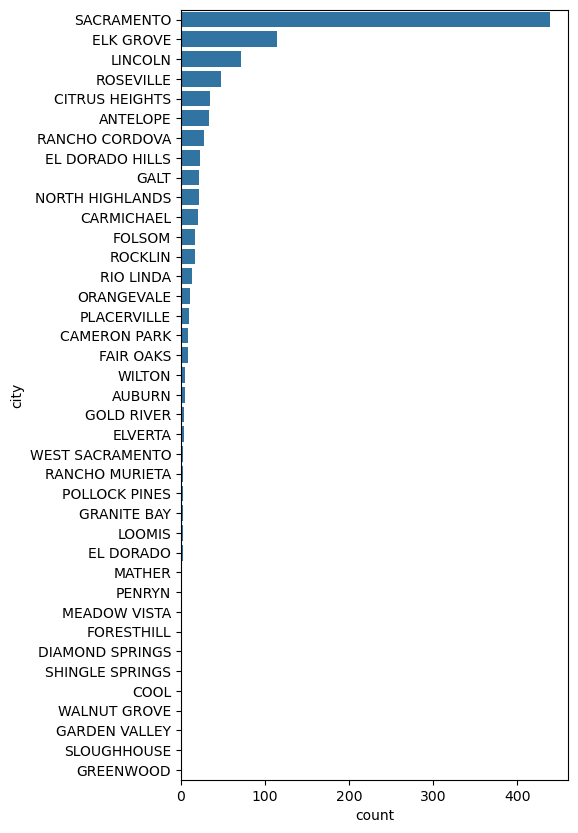

In [23]:
plt.figure(figsize=(5, 10))
sns.barplot(df['city'].value_counts(),orient='h')
plt.show()

In [25]:
#Create a folium map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
sac_map = folium.Map(location=map_center, zoom_start=10, width='1200px',height='800px')

In [27]:
type_styles = {
    'Residential': {'color': 'red', 'icon': 'home'},
    'Plot': {'color': 'green', 'icon': 'arrows'},
    'Condo': {'color': 'blue', 'icon': 'building'},
    'Multi-Family': {'color': 'purple', 'icon': 'users'}
}

In [29]:
for _, row in df.iterrows():
    style = type_styles.get(row['type'], {'color': 'gray', 'icon': 'info-sign'})
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['street'],
        icon=folium.Icon(color=style['color'], icon=style['icon'], prefix='fa')
    ).add_to(sac_map)

In [31]:
sac_map

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#Price. This is the y value that is going to be predicted as pricing may vary depending on the various features.

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
#Beds, Baths, Sq__ft, type

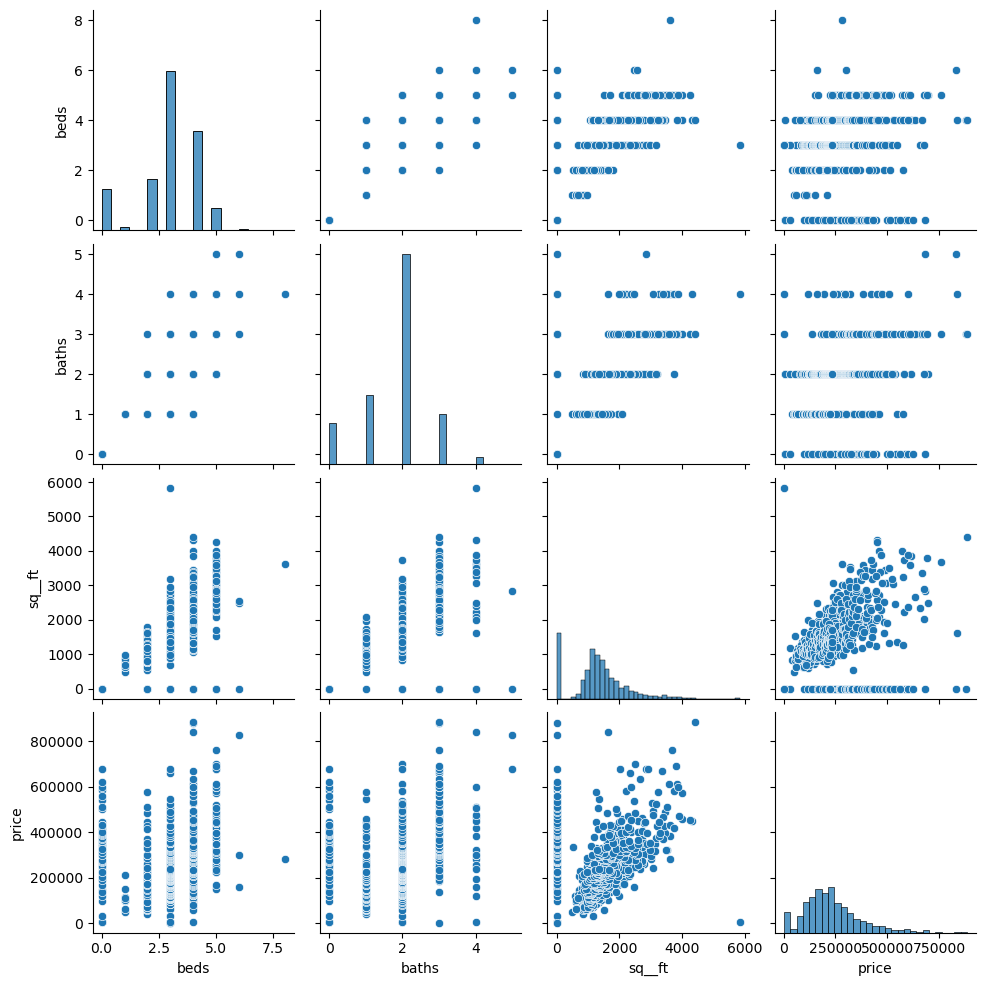

In [242]:
sns.pairplot(df[['beds','baths','sq__ft','price']])
plt.show()


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [33]:
# ANSWER
df[['beds','baths','sq__ft','price']].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.684041,0.342024
baths,0.839650,1.000000,0.665690,0.416208
sq__ft,0.684041,0.665690,1.000000,0.333897
price,0.342024,0.416208,0.333897,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [35]:
# ANSWER
#The average house price or median
print('mean = ', df['price'].mean().round(2))
print('median = ', df['price'].median())

mean =  234144.26
median =  213750.0


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [271]:
# ANSWER
residual = abs(df['price'] - df['price'].mean())
residual


0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Name: price, Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [21]:
# ANSWER
X = df['sq__ft']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [72]:
# ANSWER
def calculate_beta1 (X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    
    beta1 = (np.sum((Y - Ymean) * (X - Xmean))) / (np.sum(np.square(X-Xmean)))
    return beta1

In [74]:
beta1 = calculate_beta1 (X, Y)
beta1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [76]:
# ANSWER
beta0 = (Y.mean()) - (beta1 * X.mean())
beta0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [78]:
# ANSWER
Yhat = (beta0) + (beta1 * X)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [80]:
# ANSWER
res = Y - Yhat
res

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{tot} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Squared value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [82]:
# ANSWER

def tot_sum_of_sq (Yi):
    SStot = np.sum(np.square(Yi - Yi.mean()))
    return SStot

In [84]:
sstot = tot_sum_of_sq(Y)
sstot

18838783738865.37

In [86]:
def res_sum_of_sq (Yi, yhat):
    SSres = np.sum(np.square(Yi - yhat))
    return SSres

In [88]:
ssres = res_sum_of_sq(Y, Yhat)
ssres

16738500924917.504

In [90]:
r_squared = 1 - (ssres / sstot)
r_squared

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

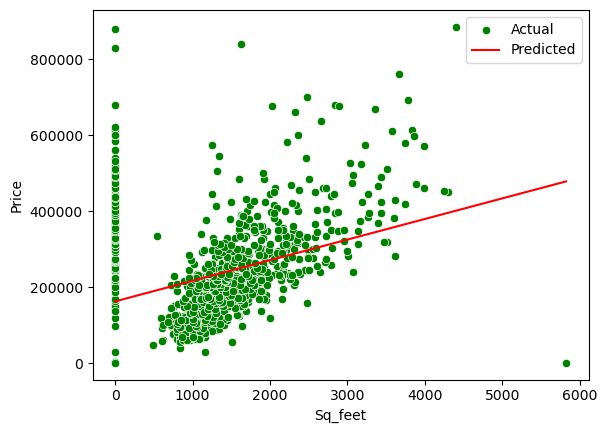

In [92]:
# ANSWER
#X is sq__ft and Y is price

#actual
sns.scatterplot(x=X, y=Y, color='green', label='Actual')

#predicted
sns.lineplot(x=X, y=Yhat, color='red', label ='Predicted')
plt.legend()
plt.xlabel('Sq_feet')
plt.ylabel('Price')
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [94]:
# ANSWER
df['Yhat'] = Yhat

In [96]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,226133.293924
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,206040.438599
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,209073.322422
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,206094.597239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,2008-05-15,232425,38.457679,-121.359620,286411.859897
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,2008-05-15,234000,38.499893,-121.458890,242922.472227
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15,235000,38.708824,-121.256803,228787.067268
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15,235301,38.417000,-121.397424,254187.469282


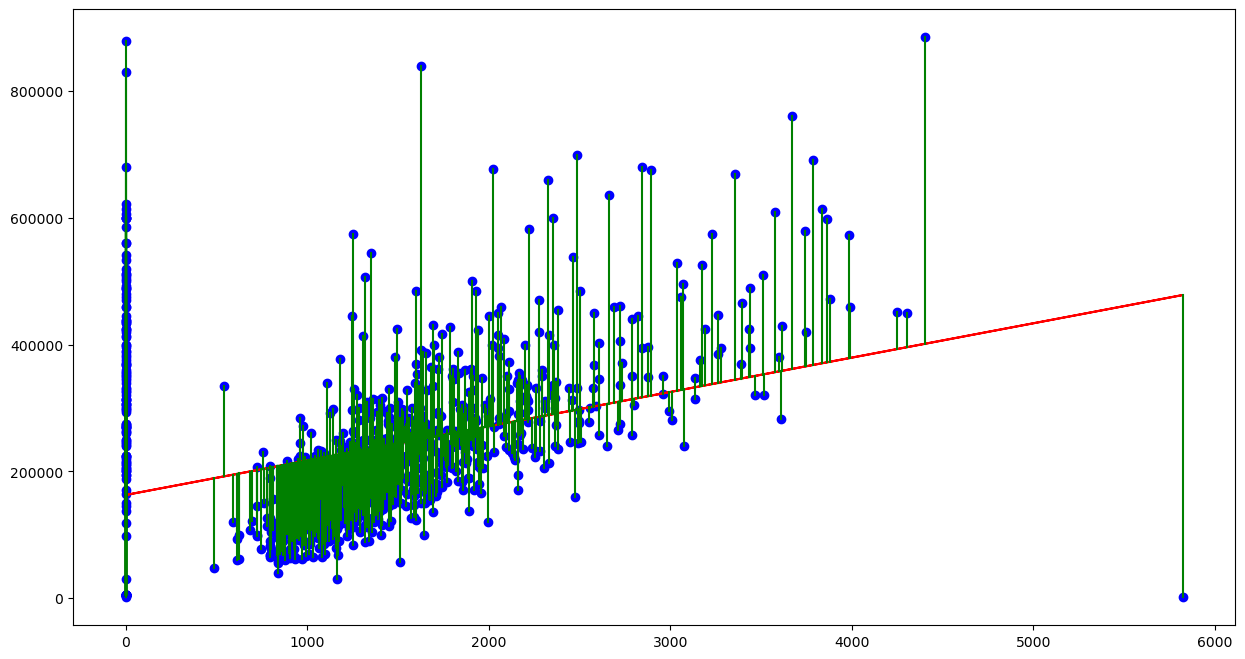

In [98]:
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [25]:
# ANSWER
xpred = 1204

In [100]:
beta1

54.158639688530755

In [102]:
beta0

162930.16140699777

In [124]:
Ypred = (beta0) + (beta1 * xpred)
print('Predicted house price = $',Ypred.round(2))

Predicted house price = $ 228137.16




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



